# Capstone Two: Pre-processing and Training Data Development

# 1.Background

Therapeutic antibodies are very important biopharmaceutics for cancers and autoimmune diseases. However, some antibodies cannot be developed and manufactured due to low stability and high aggregation of antibodies. The capstone project is to build a model predict the developability of antibodies so that the model can guide the pipelines of the development of antibodies and reduce the investment risks.

# 2.Import Modules


In [1]:
import pandas as pd 
import numpy as np

# peptides is libaray to deal with amino acids and peptides
import peptides as pt

# 3.Load Dataset

In the last project "capstone two data wrangling", the data has been cleaned and separate into theree main columns, including heavy chain, light chain, and label.

In [2]:
df = pd.read_csv('Antibody.csv',index_col=False)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()


,heavy,light,developability
0,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0


Antibody have 4 chains of amino acids, two identical heavy chains and two identical light chains. Each character represents a type of amino acid. These characters include A, R, N, D, C, E, Q, G, H, I, L, K, M, F, P, S, T, W, Y, and V. Besides, amino acids can use three letter or one letter abbreviation. For example, alanine can be expressed as Ala or A.

# 4.Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 3 columns):
heavy             1592 non-null object
light             1592 non-null object
developability    1592 non-null int64
dtypes: int64(1), object(2)
memory usage: 37.4+ KB


Ideally, the research is to estimate the developability by the amino acid sequence of heavy chain and light chain, which is very hard currently through the traditional method based on computational chemistry. 

Hevay and light are text type. Develpability is categorical variable. 

In [4]:
print("The longest heavy chain contains {} amino acids in the antibody.".format(max(df.heavy.str.len())))
print("The shortest heavy chain contains {} amino acids in the antibody.".format(min(df.heavy.str.len())))
print("The longest light chain contains {} amino acids in the antibody.".format(max(df.light.str.len())))
print("The shortest light chain contains {} amino acids in the antibody.".format(min(df.light.str.len())))

The longest heavy chain contains 171 amino acids in the antibody.
The shortest heavy chain contains 103 amino acids in the antibody.
The longest light chain contains 119 amino acids in the antibody.
The shortest light chain contains 93 amino acids in the antibody.


# 5.Encoding Amino Acid Sequence

There are only 20 types of amino acids in antibodies, which can be interpreted as categorical variables. A very simple method to encode amino acids by one-hot method so that each amino acid corresponds to a column. However, this will creat a very 20*(171+119)=5800 columns (including padding) for each antibody. Too many features can lead to overfitting issue.

Another important problem for one-hot encoding is that it cannot capture the relationship between different amino acids. For example, tryptophan and phenylalanine are two amino acids containing benzene ring. Therefore, they share some similar chemical property. A good method to encode amino acids should give similar enocde for tryptophan and phenylalanine.

Phenylalanine (Phe)


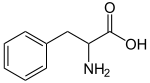

In [5]:
from IPython import display
print("Phenylalanine (Phe)")
display.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Phenylalanin_-_Phenylalanine.svg/150px-Phenylalanin_-_Phenylalanine.svg.png")

Tryptophan (Try)


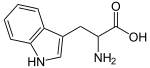

In [6]:
print("Tryptophan (Try)")
display.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Tryptophan_-_Tryptophan.svg/150px-Tryptophan_-_Tryptophan.svg.png")

In research paper *Amino acid encoding for deep learning applications*, they compared different methods to encode the amino acid. The newest method proposed in the research article is learning this embedding matrix directly from the data, referred as end-to-end learning. However, for similicity, this research will adopt a relative simple method to encode amino acids.

VHSE (principal components score **Vectors of Hydrophobic, Steric, and Electronic** properties) is a method proposed based on principal components of properties of amino acids. Researchers collected total 50 physicochemical properties of 20 amino acids, including 18 hydrophobic properties, 17 steric properties, and 15 electronic properties. (research paper: *A New Set of Amino Acid Descriptors and Its Application in Peptide QSARs*)

And then they used PCA to extract 8 most important principal components of 50 physicochemical properties of 20 amino acids and use these variables to encode amino acids. The table attached below is the table for encoding. 

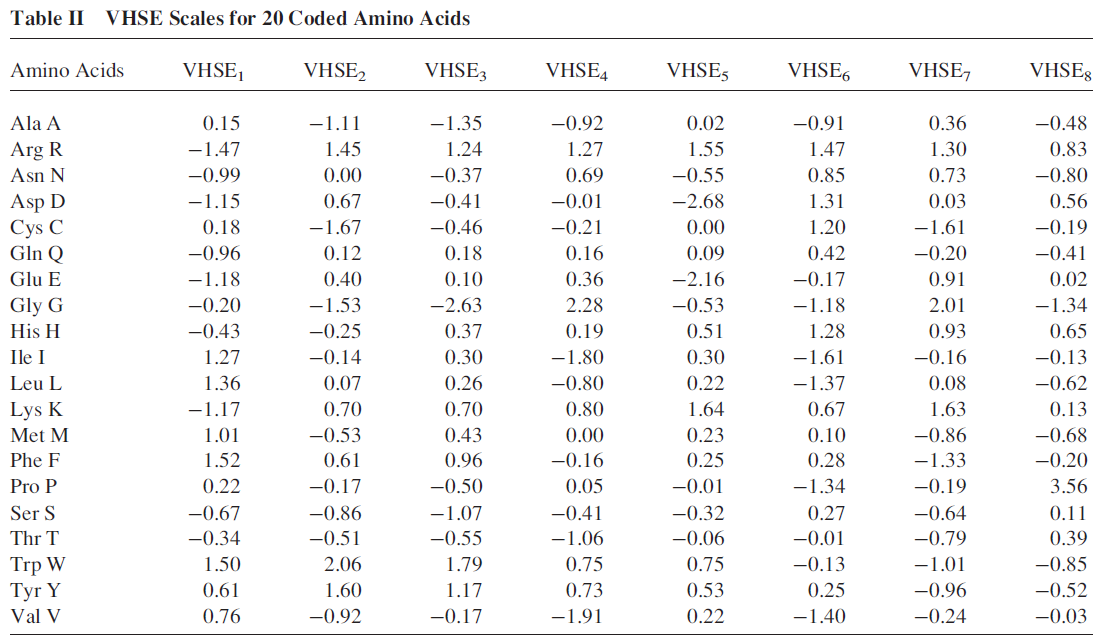

In [7]:
display.Image("./VHSE.PNG")


The pipetides libarary have such function to convert the sequence into VHSE. The availabel encoder are

In [8]:
test = pd.DataFrame([ pt.Peptide('A').descriptors() ])
len(test.columns)

75

In [9]:
test.columns

Index(['BLOSUM1', 'BLOSUM10', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5',
       'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF10', 'KF2', 'KF3',
       'KF4', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'MSWHIM1', 'MSWHIM2',
       'MSWHIM3', 'PP1', 'PP2', 'PP3', 'ProtFP1', 'ProtFP2', 'ProtFP3',
       'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'ST1', 'ST2',
       'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'SV1', 'SV2', 'SV3', 'SV4',
       'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1', 'VHSE2', 'VHSE3', 'VHSE4',
       'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5'],
      dtype='object')

Each column represents different method to encode the amino acids.

In [10]:
test.iloc[0,62:70]

VHSE1    0.15
VHSE2   -1.11
VHSE3   -1.35
VHSE4   -0.92
VHSE5    0.02
VHSE6   -0.91
VHSE7    0.36
VHSE8   -0.48
Name: 0, dtype: float64

As you can see above, VHSE of ala (A, alanine) is same as the one in the table.  

The longest heavy chain contains 171 amino acid ans 119 for light chain. Since the length of heavy chain and light chain for different antibodies are different. We need to use padding to compensate the length. In this research, 0 is used for padding. However, considering that VHSE encoder is based on chemcial property, 0 may not be the best way for padding.

In [11]:
pt.Peptide('A').descriptors()['VHSE1']

0.15

In [12]:
AA = [ "A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
CodeTable = pd.DataFrame([pt.Peptide(aa).descriptors() for aa in AA],index=AA)
CodeTable

,BLOSUM1,BLOSUM10,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,...,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8,Z1,Z2,Z3,Z4,Z5
A,0.08,0.33,-0.92,0.53,0.00,0.24,0.19,0.66,-0.05,1.36,...,-0.92,0.02,-0.91,0.36,-0.48,0.24,-2.32,0.60,-0.14,1.30
R,1.01,-0.52,0.19,-0.86,-0.61,1.28,0.20,0.66,0.18,-0.22,...,1.27,1.55,1.47,1.30,0.83,3.52,2.50,-3.50,1.99,-0.17
N,1.51,-0.14,0.22,-0.05,1.01,0.12,0.83,-0.03,-0.57,-1.20,...,0.69,-0.55,0.85,0.73,-0.80,3.05,1.62,1.04,-1.15,1.61
D,1.55,-0.28,0.01,0.32,0.49,-0.99,0.01,-1.62,0.53,-0.15,...,-0.01,-2.68,1.31,0.03,0.56,3.98,0.93,1.93,-2.46,0.75
C,-1.08,-0.10,-1.11,1.56,0.81,1.83,-1.05,-0.74,0.38,-0.12,...,-0.21,0.00,1.20,-1.61,-0.19,0.84,-1.67,3.75,0.18,-2.65
E,1.48,0.30,0.23,-0.67,-0.36,-0.28,-0.08,-1.01,0.36,0.77,...,0.36,-2.16,-0.17,0.91,0.02,3.11,0.26,-0.11,-3.04,-0.25
Q,1.09,0.67,0.30,-0.87,-0.72,0.50,-0.08,-0.44,0.20,0.38,...,0.16,0.09,0.42,-0.20,-0.41,1.75,0.50,-1.44,-1.34,0.66
G,0.85,0.24,0.17,1.73,0.09,-0.55,1.19,1.21,0.87,0.01,...,2.28,-0.53,-1.18,2.01,-1.34,2.05,-4.06,0.36,-0.82,-0.38
H,0.72,0.99,1.55,-0.80,1.55,0.35,-0.79,0.66,-0.08,-0.19,...,0.19,0.51,1.28,0.93,0.65,2.47,1.95,0.26,3.90,0.09
I,-1.46,0.21,-1.13,-0.76,0.38,-0.60,0.28,-0.13,0.20,-0.22,...,-1.80,0.30,-1.61,-0.16,-0.13,-3.89,-1.73,-1.71,-0.84,0.26


In [13]:
VHSE = CodeTable.iloc[:,62:70]
VHSE

,VHSE1,VHSE2,VHSE3,VHSE4,VHSE5,VHSE6,VHSE7,VHSE8
A,0.15,-1.11,-1.35,-0.92,0.02,-0.91,0.36,-0.48
R,-1.47,1.45,1.24,1.27,1.55,1.47,1.30,0.83
N,-0.99,0.00,-0.37,0.69,-0.55,0.85,0.73,-0.80
D,-1.15,0.67,-0.41,-0.01,-2.68,1.31,0.03,0.56
C,0.18,-1.67,-0.46,-0.21,0.00,1.20,-1.61,-0.19
E,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02
Q,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41
G,-0.20,-1.53,-2.63,2.28,-0.53,-1.18,2.01,-1.34
H,-0.43,-0.25,0.37,0.19,0.51,1.28,0.93,0.65
I,1.27,-0.14,0.30,-1.80,0.30,-1.61,-0.16,-0.13


In [14]:
# Since each amino acid encodes as 8 values. The number of features is calcultaed based on 
# the longest heavy chain and light chain of antibodies.
maxHeavyLen = max(df.heavy.str.len())
maxLightLen = max(df.light.str.len())

feature = np.zeros((len(df),maxHeavyLen*8 + maxLightLen*8+1))
feature.shape


(1592, 2321)

In [15]:
df.loc[0,'heavy']
VHSE.loc[df.loc[0,'heavy'][2]].values
df.loc[13,'heavy']

'QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLEWLGMIWGDGNTDYNSALKSRLSISKDNSKSQVFLKMNSLHTDDTARYYCARERDYRLDYWGQGTTVTVSS'

In [16]:
for row in range(len(df)):
    heavyLen = len(df.loc[row,'heavy'])
    lightLen = len(df.loc[row,'light'])
    devalopability = df.loc[row,'developability']
    
    for iAA in range(heavyLen):
        feature[row,(iAA*8):(iAA*8+8)] = VHSE.loc[df.loc[row,'heavy'][iAA]].values
        
    for jAA in range(lightLen):
        feature[row,(maxHeavyLen+jAA*8):(maxHeavyLen+jAA*8+8)] = VHSE.loc[df.loc[row,'light'][jAA]].values
        
    feature[row,-1] = devalopability

In [17]:
colname = [str(i) for i in range(maxHeavyLen*8 + maxLightLen*8)]
colname.append('developability')
len(colname)

2321

In [18]:
featureMat = pd.DataFrame(feature,columns=colname)

In [19]:
featureMat.head()

,0,1,2,3,4,5,6,7,8,9,...,2311,2312,2313,2314,2315,2316,2317,2318,2319,developability
0,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.18,0.40,0.10,0.36,-2.16,-0.17,0.91,0.02,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.96,0.12,0.18,0.16,0.09,0.42,-0.20,-0.41,0.76,-0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6.Splitting Data for Trainining and Testing

In [20]:
featureMat.developability.value_counts()

0.0    1252
1.0     340
Name: developability, dtype: int64

In [21]:
np.mean(featureMat.developability)

0.2135678391959799

As you can see, we have 2320 features and data is severely unbalnced. Only 21.3\% observations are positive. 

Too many features can lead to overfit issues due to lack of data. Even to train such kind of data, we need very powerful computer. And unbalanced data can also make this prediction biased. 

Considering that I cannot access to cluster computation, I would like to simplify the problem only for pratice. As I discussed with my tutor, removing some observations in data can reduce the computation power required and justify the unbalacned data issue. So I would to randomly keep only 340 observation with negative developability.

In [22]:
condition = featureMat.developability == 0
negativeRow = featureMat.index[condition]
rowdrop = np.random.choice(negativeRow, size=(1252-340),replace=False)
featureMat_balanced = featureMat.drop(index=rowdrop)
featureMat_balanced.developability.value_counts()

0.0    340
1.0    340
Name: developability, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [28]:
# for repeating resutls, here random state 42 is used
X_train, X_test, y_train, y_test = train_test_split(featureMat_balanced.drop(columns=['developability']), featureMat_balanced.developability, test_size=0.3, random_state=42)

In [30]:
featureMat.to_csv('featureMat_balanced.csv')